# Project 3: Analyzing Key Factors Influencing House Prices in India with Multivariate Linear          Regression



## Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis(EDA) 

### Initial Data Overview 

### Reading the Data 

In [2]:
data=pd.read_csv("india_housing_prices.csv")

In [3]:
#Gives the dimension of the dataset
data.shape

(250000, 23)

In [4]:
data

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


In [5]:
#Gives the first 5 rows of the dataset
data.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [4]:
#Gives data type of every column
data.dtypes

ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No                            int64
Total_Floors                        int64
Age_of_Property                     int64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility     object
Parking_Space                      object
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status                object
dtype: object

In [36]:
data.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [6]:
#Gives Summary Statistics
data.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


## Data Description 

#### The following are the columns in the dadaset :- 
1) ID: A unique identifier for each property listing.

2) State: The Indian state where the property is located.

3) City: The specific city within the state where the property is situated.​

4) Locality: The neighborhood or locality within the city.​

5) Property_Type: The classification of the property, such as apartment, villa, or independent house.​

6) BHK: The number of bedrooms, hall, and kitchen in the property.​

7) Size_in_SqFt: The total built-up area of the property in square feet.​

8) Price_in_Lakhs: The listing price of the property in lakhs of Indian Rupees.​

9) Price_per_SqFt: The price of the property per square foot, calculated as Price_in_Lakhs divided by Size_in_SqFt.​

10) Year_Built: The year when the property was constructed.​

11) Furnished_Status: Indicates whether the property is furnished, semi-furnished, or unfurnished.​

12) Floor_No: The floor number on which the property is located.​

13) Total_Floors: The total number of floors in the building.​

14) Age_of_Property: The age of the property, calculated as the current year minus Year_Built.​

15) Nearby_Schools: Proximity to educational institutions, possibly represented as distance in kilometers or a categorical rating.​

16) Nearby_Hospitals: Proximity to healthcare facilities, similarly represented.​

17) Public_Transport_Accessibility: Accessibility to public transportation options, which could be a distance measure or categorical rating.

18) Parking_Space: Availability of parking spaces, possibly indicating the number of spaces or a binary indicator (yes/no).​

19) Security: Details about the security features of the property, such as gated community, security personnel, etc.​

20) Amenities: List of facilities available with the property, like gym, swimming pool, etc.​

21) Facing: The direction the property faces, e.g., North, South, East, West.​

22) Owner_Type: The type of owner, such as individual, builder, or company.​

23) Availability_Status: Indicates whether the property is available for sale, rent, or has been sold/rented.

#### For our dataset:- 
Independent variable:-  Price_in_Lakhs

Dependent variable:- Rest of the Columns

In [3]:
data.corr()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
ID,1.000000,-0.001718,-0.002293,-0.001636,-0.001344,0.002734,-0.000214,0.003382,-0.002734,-0.001203,0.001429
BHK,-0.001718,1.000000,-0.001033,-0.000980,0.001174,0.000917,0.001263,-0.002862,-0.000917,-0.000762,0.001162
Size_in_SqFt,-0.002293,-0.001033,1.000000,-0.002529,-0.614533,0.004135,-0.002775,-0.003451,-0.004135,0.001966,-0.001695
Price_in_Lakhs,-0.001636,-0.000980,-0.002529,1.000000,0.555625,0.002714,-0.001719,0.001283,-0.002714,0.000155,-0.002769
Price_per_SqFt,-0.001344,0.001174,-0.614533,0.555625,1.000000,-0.001212,-0.001906,0.004175,0.001212,-0.000094,-0.000145
Year_Built,0.002734,0.000917,0.004135,0.002714,-0.001212,1.000000,-0.000686,0.003452,-1.000000,-0.000591,-0.002719
Floor_No,-0.000214,0.001263,-0.002775,-0.001719,-0.001906,-0.000686,1.000000,0.001169,0.000686,-0.000635,0.001428
Total_Floors,0.003382,-0.002862,-0.003451,0.001283,0.004175,0.003452,0.001169,1.000000,-0.003452,-0.003093,-0.005867
Age_of_Property,-0.002734,-0.000917,-0.004135,-0.002714,0.001212,-1.000000,0.000686,-0.003452,1.000000,0.000591,0.002719
Nearby_Schools,-0.001203,-0.000762,0.001966,0.000155,-0.000094,-0.000591,-0.000635,-0.003093,0.000591,1.000000,-0.002246


In [8]:
data.corr()['Price_in_Lakhs'].sort_values()

Nearby_Hospitals   -0.002769
Age_of_Property    -0.002714
Size_in_SqFt       -0.002529
Floor_No           -0.001719
ID                 -0.001636
BHK                -0.000980
Nearby_Schools      0.000155
Total_Floors        0.001283
Year_Built          0.002714
Price_per_SqFt      0.555625
Price_in_Lakhs      1.000000
Name: Price_in_Lakhs, dtype: float64

## Data Preparation 

### Dealing with Outliers 

In [5]:
def detect_and_remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = len(data)
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    after = len(data_filtered)

    print(f"{column} - Removed {before - after} outliers (Remaining: {after})")
    return data_filtered

In [6]:
data = detect_and_remove_outliers_iqr(data, 'Price_in_Lakhs')

Price_in_Lakhs - Removed 0 outliers (Remaining: 250000)


In [7]:
data = detect_and_remove_outliers_iqr(data, 'Price_per_SqFt')

Price_per_SqFt - Removed 20020 outliers (Remaining: 229980)


In [8]:
data = detect_and_remove_outliers_iqr(data, 'Size_in_SqFt')

Size_in_SqFt - Removed 0 outliers (Remaining: 229980)


In [9]:
data = detect_and_remove_outliers_iqr(data, 'BHK')

BHK - Removed 0 outliers (Remaining: 229980)


In [10]:
data = detect_and_remove_outliers_iqr(data, 'Floor_No')

Floor_No - Removed 0 outliers (Remaining: 229980)


In [11]:
data = detect_and_remove_outliers_iqr(data, 'Total_Floors')

Total_Floors - Removed 0 outliers (Remaining: 229980)


In [12]:
data = detect_and_remove_outliers_iqr(data, 'Age_of_Property')

Age_of_Property - Removed 0 outliers (Remaining: 229980)


In [13]:
data = detect_and_remove_outliers_iqr(data, 'Year_Built')

Year_Built - Removed 0 outliers (Remaining: 229980)


In [14]:
data = detect_and_remove_outliers_iqr(data, 'Nearby_Schools')

Nearby_Schools - Removed 0 outliers (Remaining: 229980)


In [15]:
data = detect_and_remove_outliers_iqr(data, 'Nearby_Hospitals')

Nearby_Hospitals - Removed 0 outliers (Remaining: 229980)


In [16]:
data.shape

(229980, 23)

#### Now the data has no outliers present. 

### Handling of Missing Values 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229980 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              229980 non-null  int64  
 1   State                           229980 non-null  object 
 2   City                            229980 non-null  object 
 3   Locality                        229980 non-null  object 
 4   Property_Type                   229980 non-null  object 
 5   BHK                             229980 non-null  int64  
 6   Size_in_SqFt                    229980 non-null  int64  
 7   Price_in_Lakhs                  229980 non-null  float64
 8   Price_per_SqFt                  229980 non-null  float64
 9   Year_Built                      229980 non-null  int64  
 10  Furnished_Status                229980 non-null  object 
 11  Floor_No                        229980 non-null  int64  
 12  Total_Floors    

In [34]:
for col in data.columns:
    print(f"\nColumn: {col}")
    print(data[col].unique())


Column: ID
[     1      2      3 ... 249998 249999 250000]

Column: State
['Tamil Nadu' 'Maharashtra' 'Punjab' 'Rajasthan' 'West Bengal'
 'Chhattisgarh' 'Delhi' 'Jharkhand' 'Karnataka' 'Uttar Pradesh' 'Assam'
 'Uttarakhand' 'Telangana' 'Bihar' 'Gujarat' 'Haryana' 'Andhra Pradesh'
 'Madhya Pradesh' 'Kerala' 'Odisha']

Column: City
['Chennai' 'Pune' 'Ludhiana' 'Jodhpur' 'Jaipur' 'Durgapur' 'Coimbatore'
 'Bilaspur' 'New Delhi' 'Ranchi' 'Bangalore' 'Nagpur' 'Lucknow' 'Silchar'
 'Dehradun' 'Warangal' 'Gaya' 'Jamshedpur' 'Ahmedabad' 'Hyderabad'
 'Faridabad' 'Amritsar' 'Kolkata' 'Dwarka' 'Vishakhapatnam' 'Bhopal'
 'Indore' 'Haridwar' 'Mysore' 'Patna' 'Raipur' 'Vijayawada' 'Trivandrum'
 'Noida' 'Kochi' 'Surat' 'Gurgaon' 'Mangalore' 'Cuttack' 'Bhubaneswar'
 'Guwahati' 'Mumbai']

Column: Locality
['Locality_84' 'Locality_490' 'Locality_167' 'Locality_393' 'Locality_466'
 'Locality_246' 'Locality_254' 'Locality_232' 'Locality_122'
 'Locality_462' 'Locality_227' 'Locality_287' 'Locality_148'
 'Lo

In [18]:
data.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

#### Thus the dataset has no missing values. 

In [19]:
data.duplicated().sum()
#Thus the dataset has no duplicated rows.

0

### Data Visualization 

In [18]:
data=data.drop(columns='ID')

In [19]:
data.columns

Index(['State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

#### 1) Per category, no of properties. 

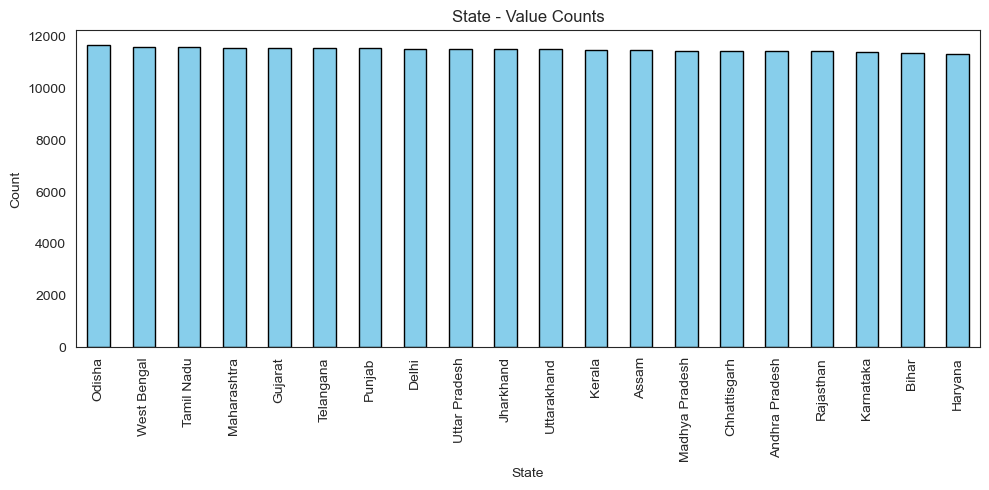

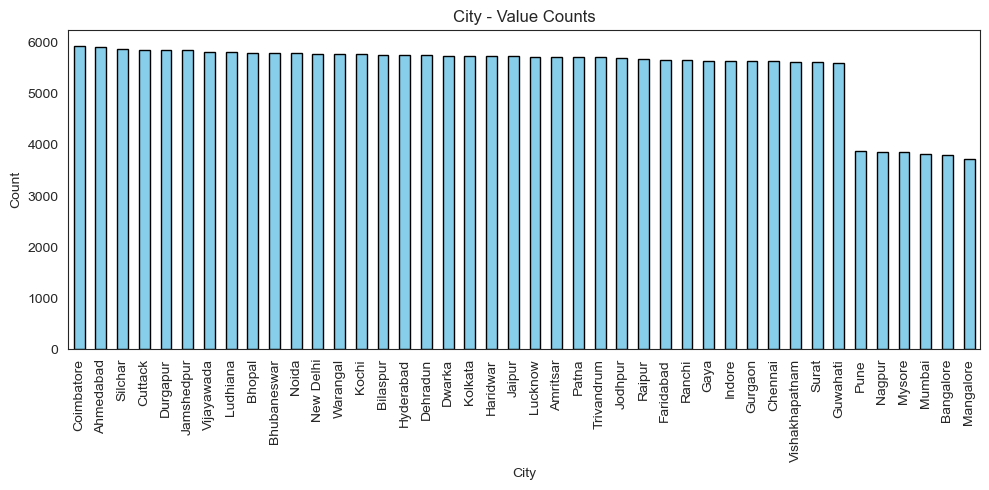

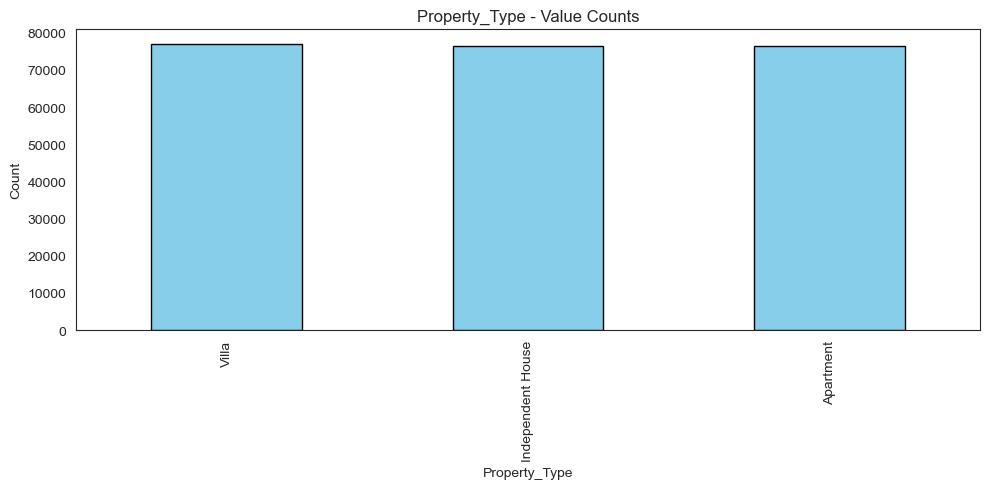

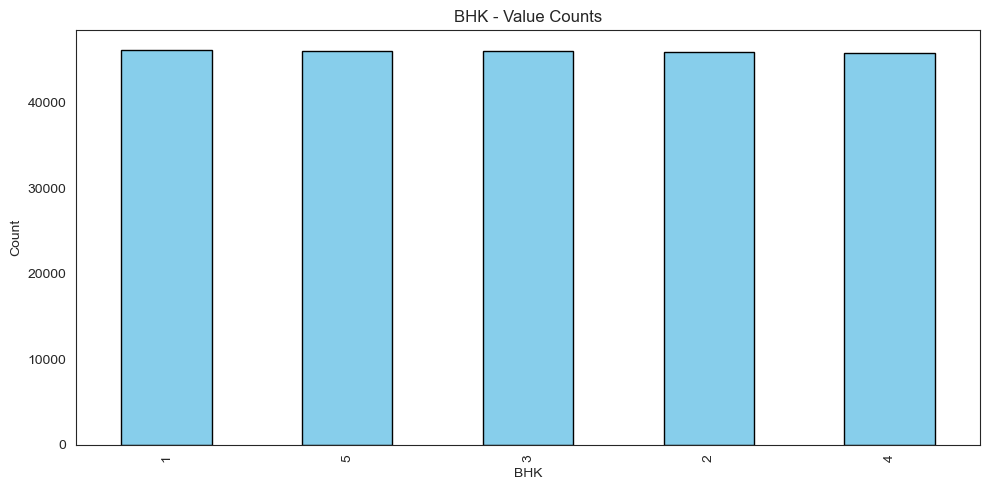

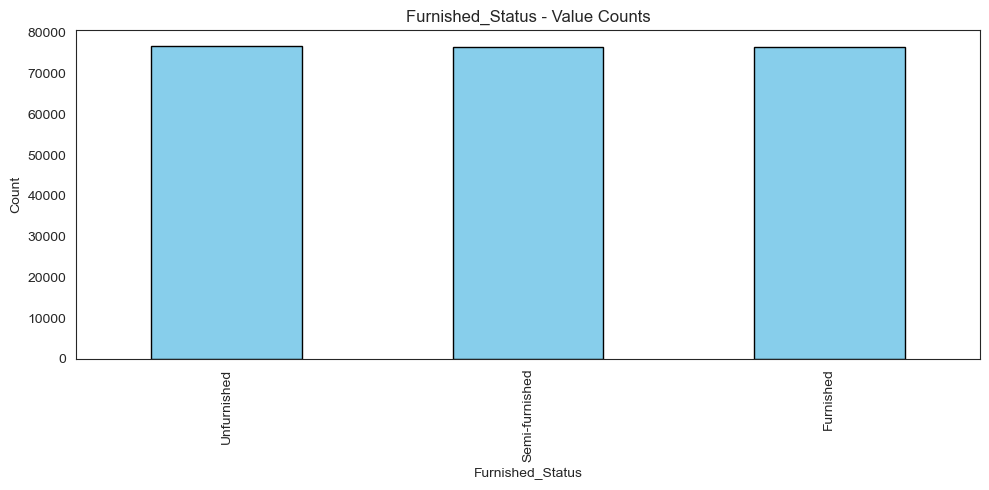

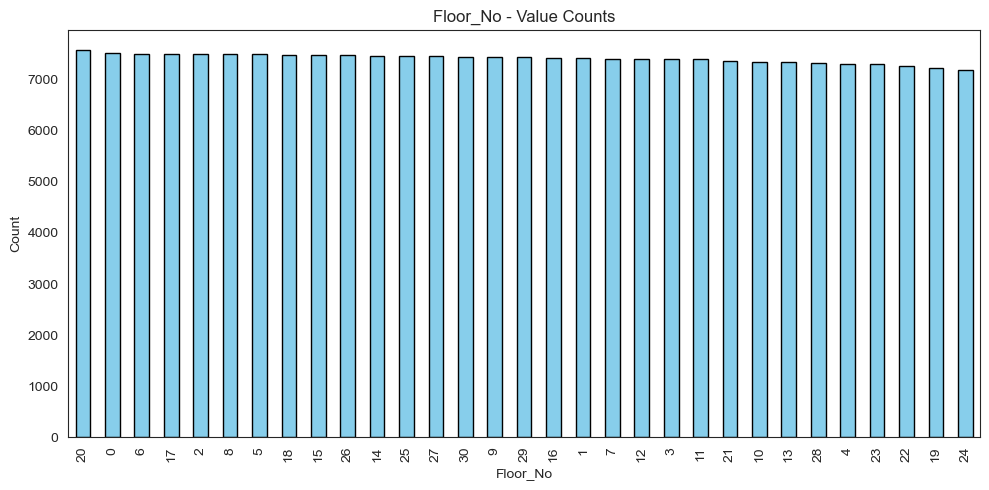

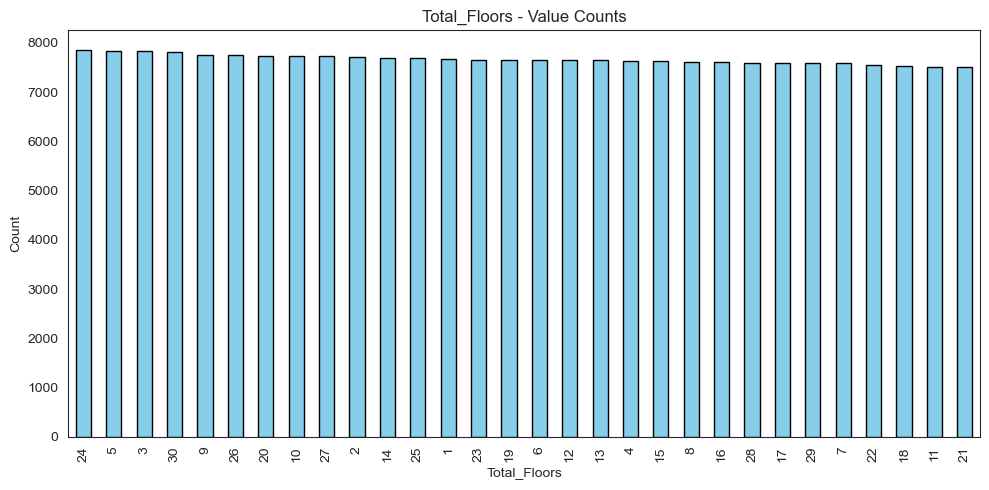

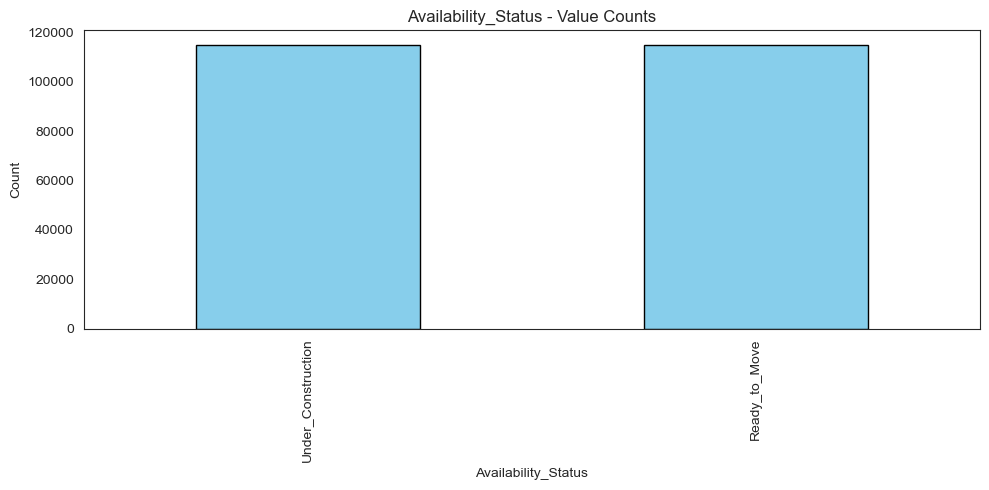

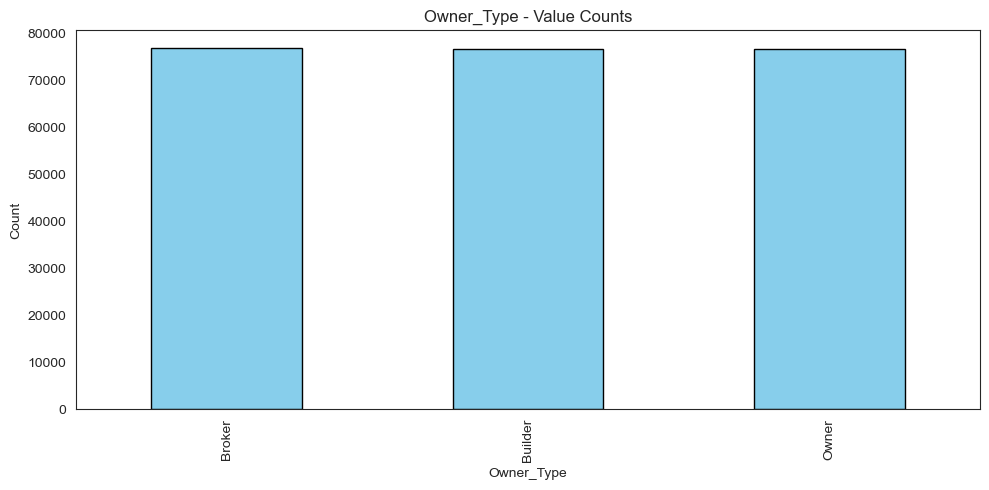

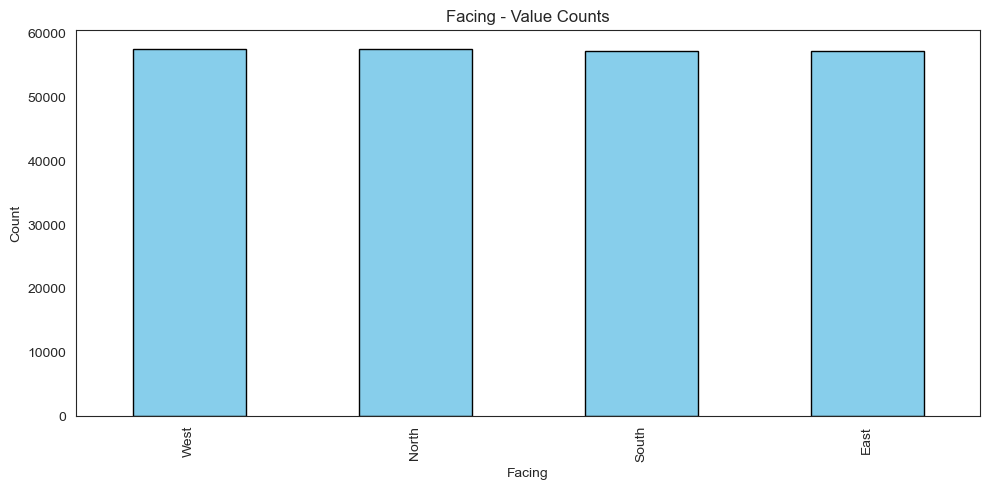

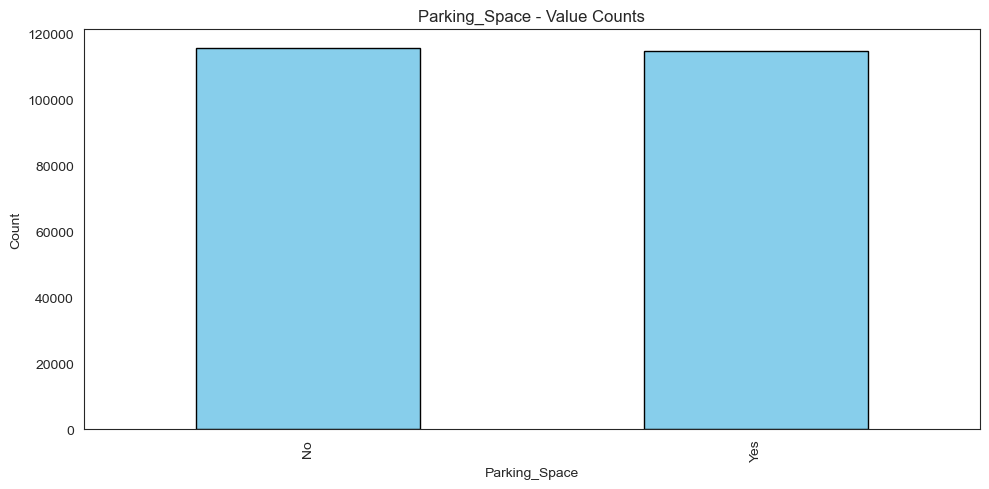

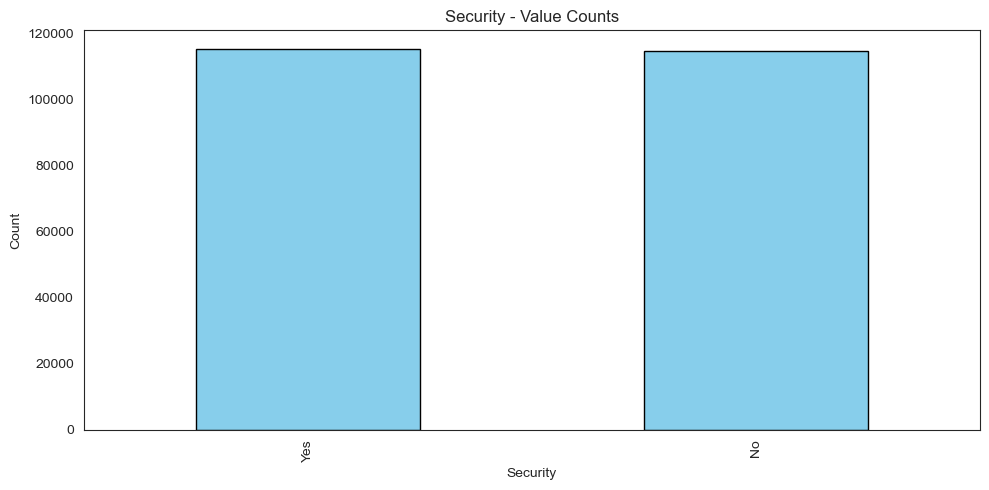

In [37]:
categorical_columns = ['State', 'City', 'Property_Type', 'BHK', 'Furnished_Status',
                       'Floor_No', 'Total_Floors', 'Availability_Status',
                       'Owner_Type', 'Facing', 'Parking_Space', 'Security']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    
    counts = data[col].value_counts()
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} - Value Counts')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

#### 2) Most common BHK configuration 

In [7]:
bhk_counts = data['BHK'].value_counts()
most_common_bhk = bhk_counts.idxmax()
most_common_count = bhk_counts.max()
print("Most common BHK configuration:", most_common_bhk)
print("Number of properties with this configuration:", most_common_count)

Most common BHK configuration: 1
Number of properties with this configuration: 46146


#### 3) How many properties are listed per state? 

In [39]:
data['State'].value_counts()

Odisha            11658
West Bengal       11602
Tamil Nadu        11586
Maharashtra       11567
Gujarat           11548
Telangana         11546
Punjab            11543
Delhi             11537
Uttar Pradesh     11524
Jharkhand         11513
Uttarakhand       11503
Kerala            11499
Assam             11475
Madhya Pradesh    11453
Chhattisgarh      11452
Andhra Pradesh    11450
Rajasthan         11430
Karnataka         11399
Bihar             11378
Haryana           11317
Name: State, dtype: int64

#### 4) How many properties are present per city in each state?  

In [40]:
print(data.groupby('State')['City'].value_counts())

State           City          
Andhra Pradesh  Vijayawada        5826
                Vishakhapatnam    5624
Assam           Silchar           5876
                Guwahati          5599
Bihar           Patna             5726
                Gaya              5652
Chhattisgarh    Bilaspur          5767
                Raipur            5685
Delhi           New Delhi         5789
                Dwarka            5748
Gujarat         Ahmedabad         5925
                Surat             5623
Haryana         Faridabad         5669
                Gurgaon           5648
Jharkhand       Jamshedpur        5850
                Ranchi            5663
Karnataka       Mysore            3863
                Bangalore         3811
                Mangalore         3725
Kerala          Kochi             5780
                Trivandrum        5719
Madhya Pradesh  Bhopal            5802
                Indore            5651
Maharashtra     Pune              3881
                Nagpur           

In [18]:
city_count = dict(data[['City', 'State']].value_counts())
city_count

{('Coimbatore', 'Tamil Nadu'): 5946,
 ('Ahmedabad', 'Gujarat'): 5925,
 ('Silchar', 'Assam'): 5876,
 ('Cuttack', 'Odisha'): 5861,
 ('Durgapur', 'West Bengal'): 5857,
 ('Jamshedpur', 'Jharkhand'): 5850,
 ('Vijayawada', 'Andhra Pradesh'): 5826,
 ('Ludhiana', 'Punjab'): 5814,
 ('Bhopal', 'Madhya Pradesh'): 5802,
 ('Bhubaneswar', 'Odisha'): 5797,
 ('Noida', 'Uttar Pradesh'): 5793,
 ('New Delhi', 'Delhi'): 5789,
 ('Warangal', 'Telangana'): 5785,
 ('Kochi', 'Kerala'): 5780,
 ('Bilaspur', 'Chhattisgarh'): 5767,
 ('Hyderabad', 'Telangana'): 5761,
 ('Dehradun', 'Uttarakhand'): 5760,
 ('Dwarka', 'Delhi'): 5748,
 ('Kolkata', 'West Bengal'): 5745,
 ('Haridwar', 'Uttarakhand'): 5743,
 ('Jaipur', 'Rajasthan'): 5734,
 ('Lucknow', 'Uttar Pradesh'): 5731,
 ('Amritsar', 'Punjab'): 5729,
 ('Patna', 'Bihar'): 5726,
 ('Trivandrum', 'Kerala'): 5719,
 ('Jodhpur', 'Rajasthan'): 5696,
 ('Raipur', 'Chhattisgarh'): 5685,
 ('Faridabad', 'Haryana'): 5669,
 ('Ranchi', 'Jharkhand'): 5663,
 ('Gaya', 'Bihar'): 5652,
 (

In [20]:
city_count = dict(sorted(city_count.items(),key=lambda x:x[0][1]))
city_count

{('Vijayawada', 'Andhra Pradesh'): 5826,
 ('Vishakhapatnam', 'Andhra Pradesh'): 5624,
 ('Silchar', 'Assam'): 5876,
 ('Guwahati', 'Assam'): 5599,
 ('Patna', 'Bihar'): 5726,
 ('Gaya', 'Bihar'): 5652,
 ('Bilaspur', 'Chhattisgarh'): 5767,
 ('Raipur', 'Chhattisgarh'): 5685,
 ('New Delhi', 'Delhi'): 5789,
 ('Dwarka', 'Delhi'): 5748,
 ('Ahmedabad', 'Gujarat'): 5925,
 ('Surat', 'Gujarat'): 5623,
 ('Faridabad', 'Haryana'): 5669,
 ('Gurgaon', 'Haryana'): 5648,
 ('Jamshedpur', 'Jharkhand'): 5850,
 ('Ranchi', 'Jharkhand'): 5663,
 ('Mysore', 'Karnataka'): 3863,
 ('Bangalore', 'Karnataka'): 3811,
 ('Mangalore', 'Karnataka'): 3725,
 ('Kochi', 'Kerala'): 5780,
 ('Trivandrum', 'Kerala'): 5719,
 ('Bhopal', 'Madhya Pradesh'): 5802,
 ('Indore', 'Madhya Pradesh'): 5651,
 ('Pune', 'Maharashtra'): 3881,
 ('Nagpur', 'Maharashtra'): 3869,
 ('Mumbai', 'Maharashtra'): 3817,
 ('Cuttack', 'Odisha'): 5861,
 ('Bhubaneswar', 'Odisha'): 5797,
 ('Ludhiana', 'Punjab'): 5814,
 ('Amritsar', 'Punjab'): 5729,
 ('Jaipur', 'R

#### 5) How many properties are present per city. 

In [69]:
city_count = {city_state[0]:count for city_state, count in city_count.items()}
city_count

{'Vijayawada': 5826,
 'Vishakhapatnam': 5624,
 'Silchar': 5876,
 'Guwahati': 5599,
 'Patna': 5726,
 'Gaya': 5652,
 'Bilaspur': 5767,
 'Raipur': 5685,
 'New Delhi': 5789,
 'Dwarka': 5748,
 'Ahmedabad': 5925,
 'Surat': 5623,
 'Faridabad': 5669,
 'Gurgaon': 5648,
 'Jamshedpur': 5850,
 'Ranchi': 5663,
 'Mysore': 3863,
 'Bangalore': 3811,
 'Mangalore': 3725,
 'Kochi': 5780,
 'Trivandrum': 5719,
 'Bhopal': 5802,
 'Indore': 5651,
 'Pune': 3881,
 'Nagpur': 3869,
 'Mumbai': 3817,
 'Cuttack': 5861,
 'Bhubaneswar': 5797,
 'Ludhiana': 5814,
 'Amritsar': 5729,
 'Jaipur': 5734,
 'Jodhpur': 5696,
 'Coimbatore': 5946,
 'Chennai': 5640,
 'Warangal': 5785,
 'Hyderabad': 5761,
 'Noida': 5793,
 'Lucknow': 5731,
 'Dehradun': 5760,
 'Haridwar': 5743,
 'Durgapur': 5857,
 'Kolkata': 5745}

#### 6) Graphical representation of number of properties per city in each state. 

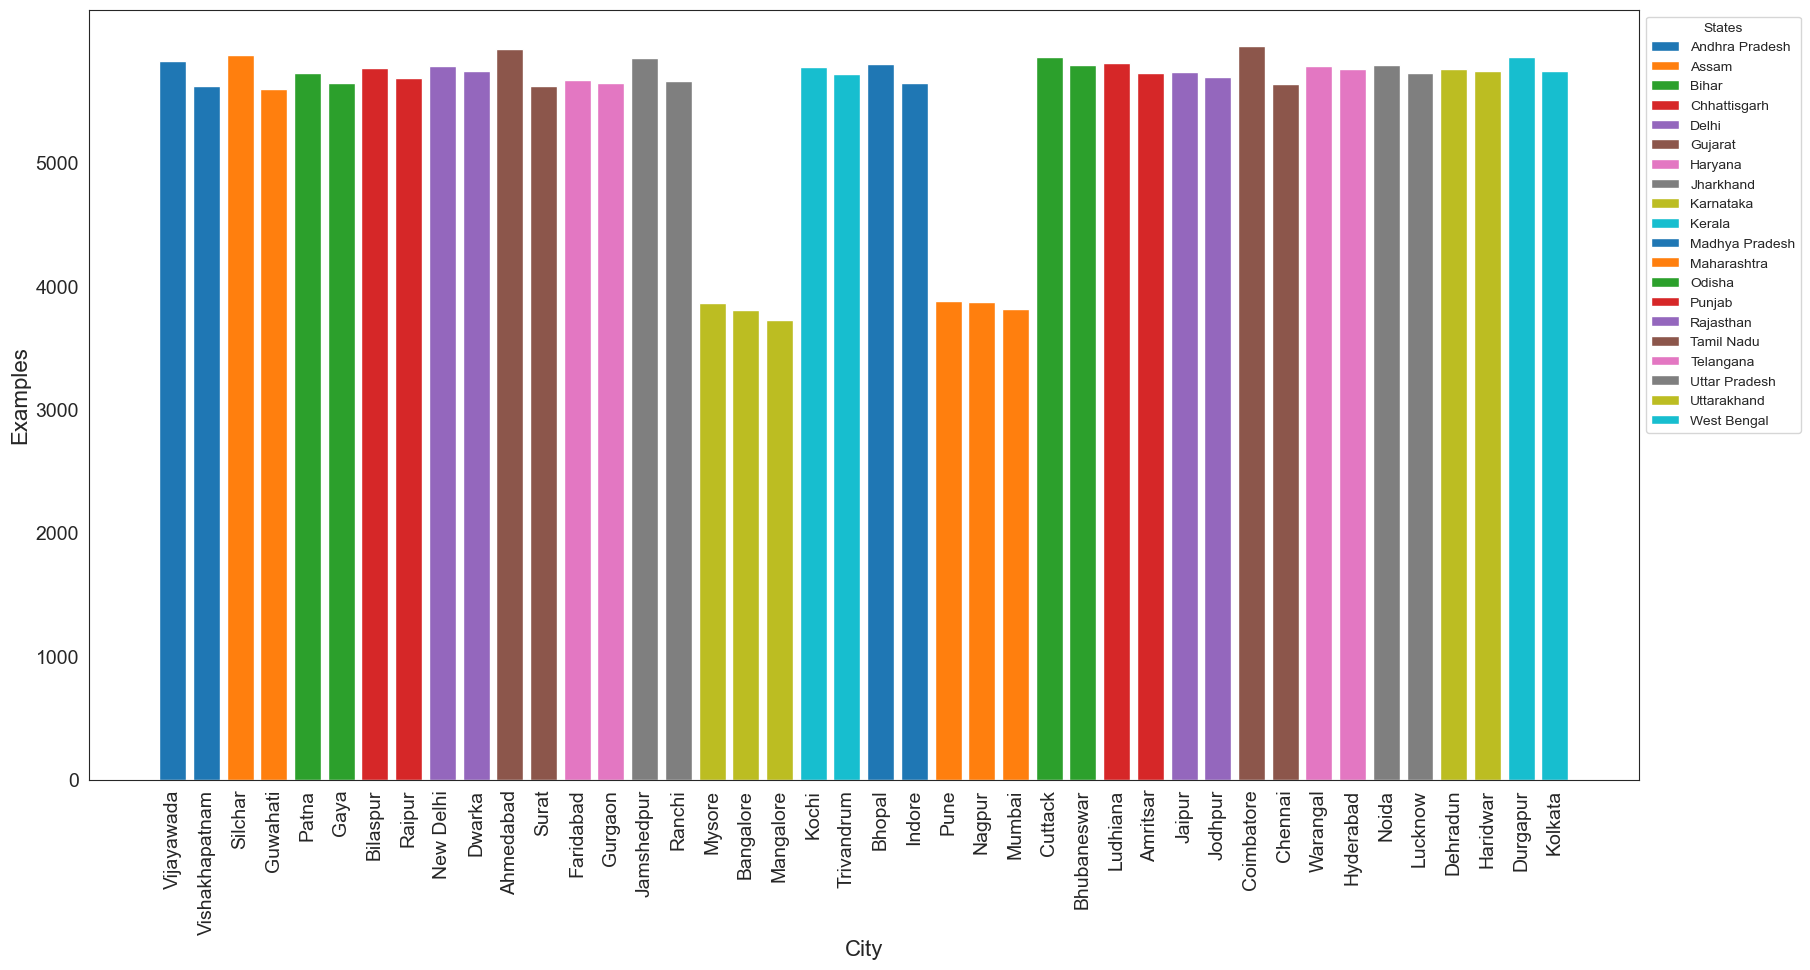

In [65]:
from itertools import cycle
import matplotlib.cm as cm
import math
state_colors = cycle(cm.tab10.colors)    # use default matplotlib colormap
state_to_color = {state: next(state_colors) for state in sorted(data['State'].unique())}
city_to_state = dict(zip(data['City'], data['State']))


bar_colors = [state_to_color[city_to_state[city]] for city in city_count.keys()]
fig, ax = plt.subplots(figsize=(20,10))

# Add legend for states
for state, color in state_to_color.items():
    ax.bar(0, 0, label=state)  # Add invisible bars for the legend

ax.bar(city_count.keys(), city_count.values(), color=bar_colors)
ax.set_xticks(range(len(city_count.keys())))
ax.set_xticklabels(city_count.keys(), rotation=90, fontsize=14)
ax.set_xlabel('City', fontsize=16)

ax.set_yticks(range(0,math.ceil(max(city_count.values())/1000)*1000, 1000))  # Change Y ticks location 
y_ticks = ax.get_yticks()     # Get Y ticks to change fontsize
ax.set_yticklabels(y_ticks, fontsize=14)
ax.set_ylabel('Examples', fontsize=16)

ax.legend(title='States', bbox_to_anchor=(1,1))
plt.show()

#### 7) Average Property Prices across States and it's corresponding line plot. 

In [17]:
data[['Price_in_Lakhs', 'BHK', 'Size_in_SqFt']]

,Price_in_Lakhs,BHK,Size_in_SqFt
0,489.76,1,4740
1,195.52,3,2364
2,183.79,2,3642
3,300.29,2,2741
4,182.90,4,4823
...,...,...,...
249995,274.75,5,1995
249996,13.40,1,2293
249997,236.94,4,2910
249998,141.66,1,1149


In [18]:
avg_prop_prices = data.groupby('State')['Price_in_Lakhs'].agg('mean').sort_values()
avg_prop_prices

State
Assam             240.765028
Chhattisgarh      240.795480
Delhi             241.058605
Odisha            241.162576
Punjab            241.344138
West Bengal       242.269584
Jharkhand         242.531161
Uttarakhand       242.917865
Haryana           242.992076
Kerala            243.000290
Bihar             243.038966
Rajasthan         243.246041
Andhra Pradesh    243.420737
Maharashtra       243.623837
Gujarat           243.887289
Telangana         244.056916
Madhya Pradesh    244.630060
Uttar Pradesh     245.089346
Tamil Nadu        245.315716
Karnataka         245.689566
Name: Price_in_Lakhs, dtype: float64

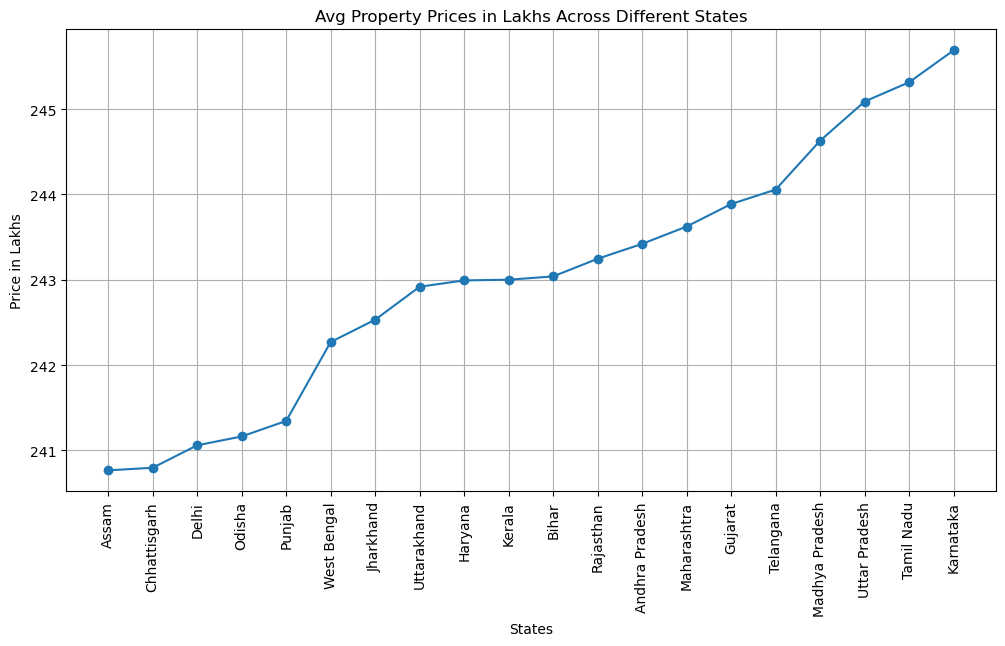

In [8]:
#Line Plot
plt.figure(figsize=(12, 6))
plt.plot(avg_prop_prices.index, avg_prop_prices.values, marker='o')
plt.xlabel('States')
plt.ylabel('Price in Lakhs')
plt.xticks(rotation=90)
plt.title('Avg Property Prices in Lakhs Across Different States')
plt.grid(True)
plt.show()

#### 7)a) Most affordable top 10 states. 

In [19]:
affordable_states = avg_prop_prices.head(5)

In [20]:
affordable_states

State
Assam           240.765028
Chhattisgarh    240.795480
Delhi           241.058605
Odisha          241.162576
Punjab          241.344138
Name: Price_in_Lakhs, dtype: float64

#### 8) To determine the average property size and price per square foot for each state and it's corresponding line plot.

In [9]:
#average property size for each state
avg_price = data.groupby('State')['Size_in_SqFt'].mean().sort_values()
avg_price

State
Assam             2897.657691
Maharashtra       2898.118527
Andhra Pradesh    2898.246987
Uttar Pradesh     2902.231083
Jharkhand         2903.258751
Punjab            2907.042623
Karnataka         2910.651548
Chhattisgarh      2911.342473
Rajasthan         2912.841207
Telangana         2914.890958
Delhi             2917.420993
Madhya Pradesh    2921.092290
Uttarakhand       2921.855516
Gujarat           2922.812435
Bihar             2925.139040
Odisha            2925.329559
West Bengal       2926.920100
Haryana           2927.722011
Kerala            2934.122793
Tamil Nadu        2934.468496
Name: Size_in_SqFt, dtype: float64

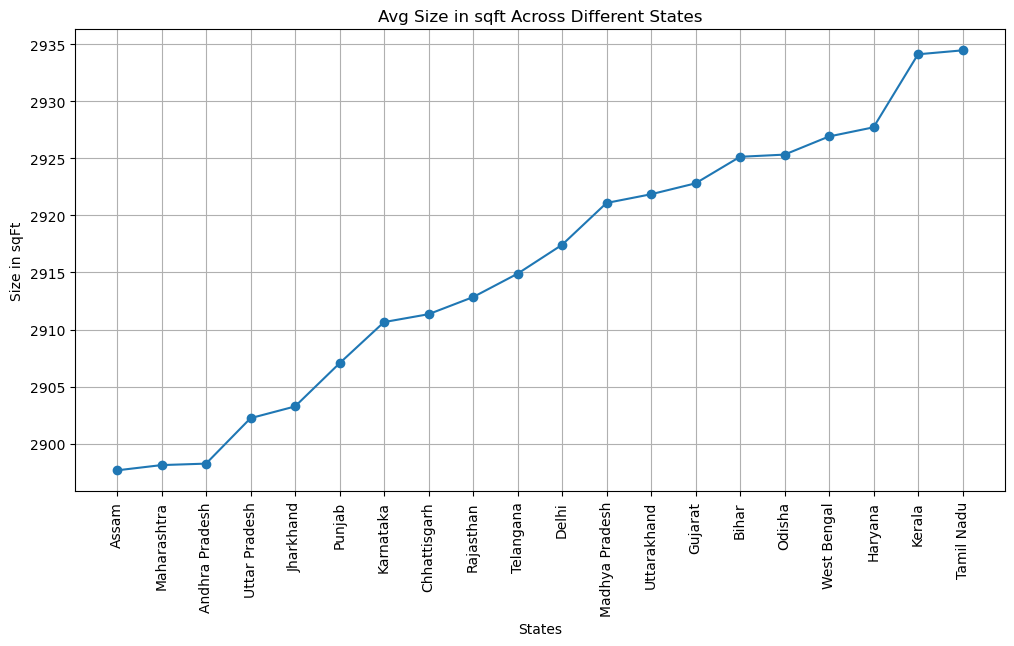

In [12]:
#Line Plot
plt.figure(figsize=(12, 6))
plt.plot(avg_price.index, avg_price.values, marker='o')
plt.xlabel('States')
plt.ylabel('Size in sqFt')
plt.xticks(rotation=90)
plt.title('Avg Size in sqft Across Different States')
plt.grid(True)
plt.show()

In [11]:
#average price per square foot for each state
price_per_sqft = data.groupby('State')['Price_per_SqFt'].mean().sort_values()
price_per_sqft

State
Delhi             0.098951
Chhattisgarh      0.099211
West Bengal       0.099275
Uttarakhand       0.099322
Rajasthan         0.099394
Kerala            0.099475
Odisha            0.099527
Assam             0.099549
Bihar             0.099556
Tamil Nadu        0.099685
Punjab            0.099738
Haryana           0.099746
Gujarat           0.099869
Jharkhand         0.100180
Madhya Pradesh    0.100214
Telangana         0.100553
Andhra Pradesh    0.100580
Karnataka         0.100811
Maharashtra       0.101182
Uttar Pradesh     0.101534
Name: Price_per_SqFt, dtype: float64

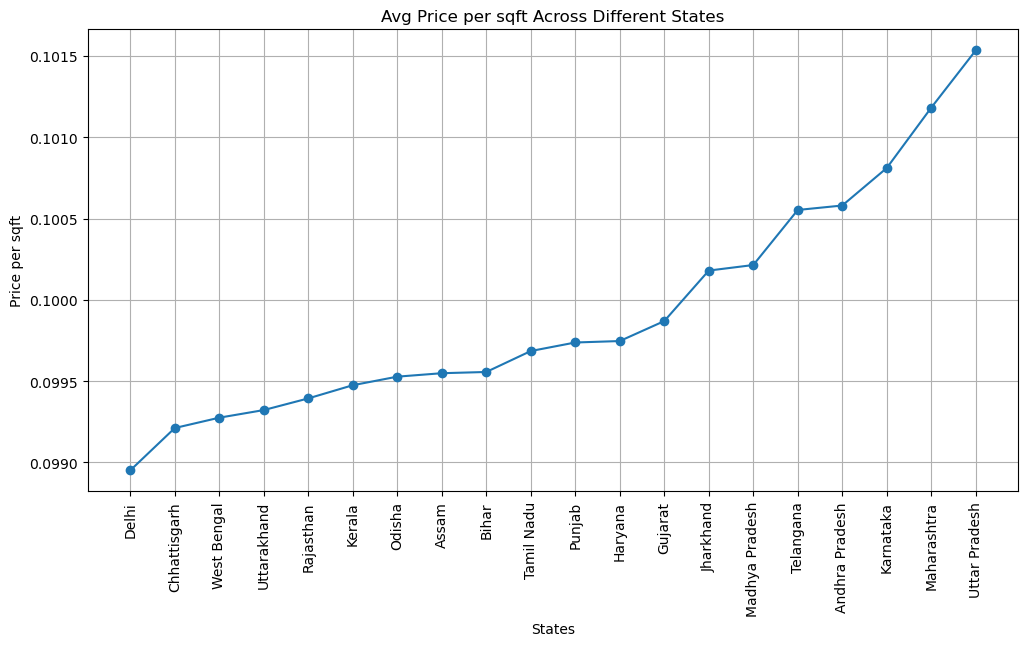

In [13]:
#Line Plot
plt.figure(figsize=(12, 6))
plt.plot(price_per_sqft.index, price_per_sqft.values, marker='o')
plt.xlabel('States')
plt.ylabel('Price per sqft')
plt.xticks(rotation=90)
plt.title('Avg Price per sqft Across Different States')
plt.grid(True)
plt.show()

#### 9) Furnishing status and availability 

In [24]:
furnishing_price_comparison = data.groupby('Availability_Status')['Price_in_Lakhs'].mean()
furnishing_price_comparison

Availability_Status
Ready_to_Move         243.470866
Under_Construction    242.609665
Name: Price_in_Lakhs, dtype: float64

#### 10)Age of properties and price trends 

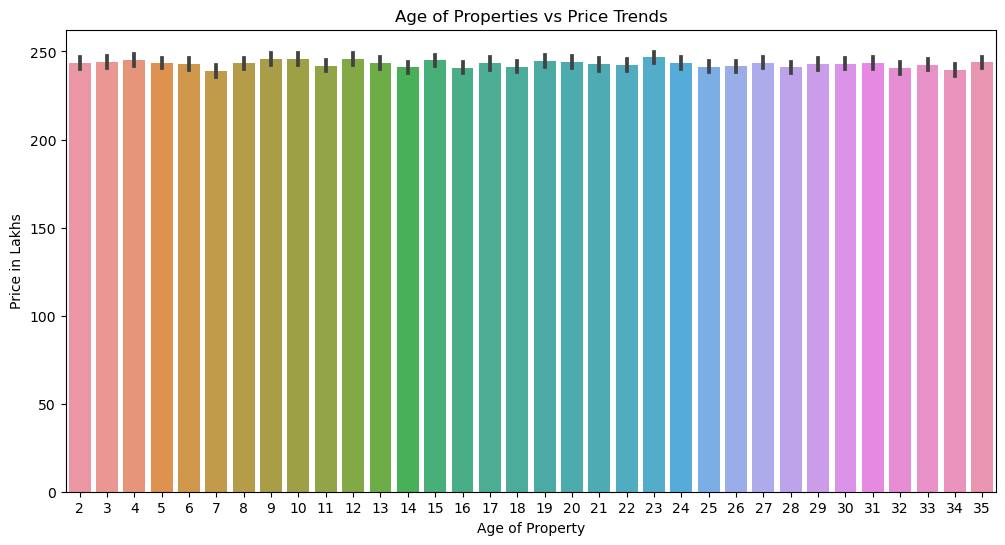

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Age_of_Property', y='Price_in_Lakhs')
plt.title('Age of Properties vs Price Trends')
plt.xlabel('Age of Property')
plt.ylabel('Price in Lakhs')
plt.show()

#### 11) Year built vs Price Trends 

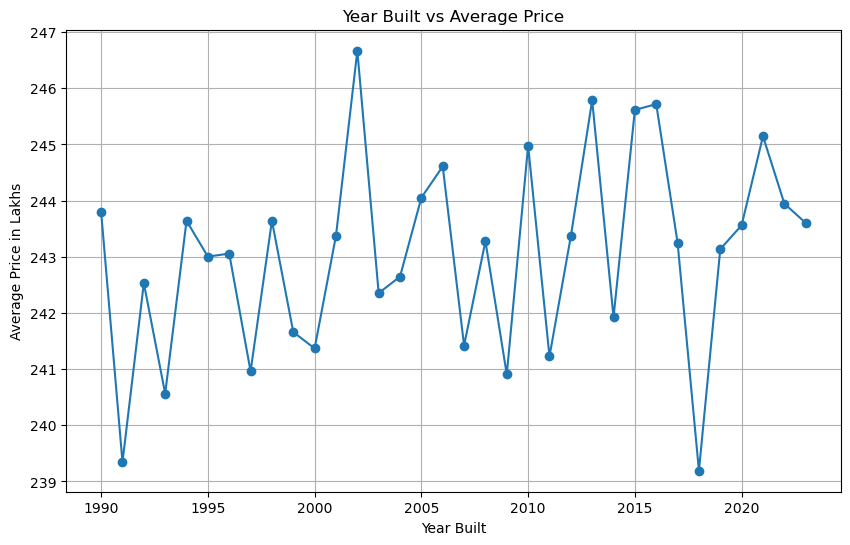

In [29]:
data['Year_Built'] = pd.to_numeric(data['Year_Built'], errors='coerce')
yearly_trends = data.groupby('Year_Built')['Price_in_Lakhs'].mean().dropna()

plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o')
plt.title('Year Built vs Average Price')
plt.xlabel('Year Built')
plt.ylabel('Average Price in Lakhs')
plt.grid(True)
plt.show()

### Data Preprocessing

In [20]:
data['Price_for_Area']=data['Size_in_SqFt']*data['Price_per_SqFt']
data['School_and_Hospitals']=data['Nearby_Schools']+data['Nearby_Hospitals']

In [21]:
data.drop(columns=['Size_in_SqFt','Price_per_SqFt','Year_Built','Nearby_Hospitals','Nearby_Schools','Locality'],inplace=True)

In [22]:
data.head()

,State,City,Property_Type,BHK,Price_in_Lakhs,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Price_for_Area,School_and_Hospitals
0,Tamil Nadu,Chennai,Apartment,1,489.76,Furnished,22,1,35,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,474.00,13
1,Maharashtra,Pune,Independent House,3,195.52,Unfurnished,21,20,17,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,189.12,9
2,Punjab,Ludhiana,Apartment,2,183.79,Semi-furnished,19,27,28,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,182.10,17
3,Rajasthan,Jodhpur,Independent House,2,300.29,Furnished,21,26,34,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,301.51,12
4,Rajasthan,Jaipur,Villa,4,182.90,Semi-furnished,3,2,23,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,192.92,13


In [23]:
data.shape

(229980, 18)

In [24]:
split_amenities = data['Amenities'].str.split(',')
# Step 2: Flatten the list of lists into a single list and strip spaces
all_amenities = [item.strip() for sublist in split_amenities for item in sublist]
# Step 3: Get unique items
unique_amenities = set(all_amenities)
unique_amenities

{'Clubhouse', 'Garden', 'Gym', 'Playground', 'Pool'}

In [25]:
data['State'] = data['State'].str.lower().str.strip()
data['City'] = data['City'].str.lower().str.strip()
data['State_City'] = data['State'] + '_' + data['City']
data.drop(columns=['State','City'],inplace=True)

In [26]:
data.head()

,Property_Type,BHK,Price_in_Lakhs,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Price_for_Area,School_and_Hospitals,State_City
0,Apartment,1,489.76,Furnished,22,1,35,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,474.00,13,tamil nadu_chennai
1,Independent House,3,195.52,Unfurnished,21,20,17,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,189.12,9,maharashtra_pune
2,Apartment,2,183.79,Semi-furnished,19,27,28,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,182.10,17,punjab_ludhiana
3,Independent House,2,300.29,Furnished,21,26,34,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,301.51,12,rajasthan_jodhpur
4,Villa,4,182.90,Semi-furnished,3,2,23,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,192.92,13,rajasthan_jaipur


In [27]:
data=data.drop(columns='Total_Floors')

In [28]:
data.head()

,Property_Type,BHK,Price_in_Lakhs,Furnished_Status,Floor_No,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Price_for_Area,School_and_Hospitals,State_City
0,Apartment,1,489.76,Furnished,22,35,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,474.00,13,tamil nadu_chennai
1,Independent House,3,195.52,Unfurnished,21,17,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,189.12,9,maharashtra_pune
2,Apartment,2,183.79,Semi-furnished,19,28,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,182.10,17,punjab_ludhiana
3,Independent House,2,300.29,Furnished,21,34,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,301.51,12,rajasthan_jodhpur
4,Villa,4,182.90,Semi-furnished,3,23,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,192.92,13,rajasthan_jaipur


In [29]:
data.shape

(229980, 16)

In [30]:
data["Amenities"] = data["Amenities"].str.replace(r"\s+", "", regex=True).str.lower()
data_encoded = data["Amenities"].str.get_dummies(sep=",")
data = pd.concat([data, data_encoded], axis=1)
data.drop(columns='Amenities',inplace=True)
data.shape

(229980, 20)

In [31]:
data.head()

,Property_Type,BHK,Price_in_Lakhs,Furnished_Status,Floor_No,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Price_for_Area,School_and_Hospitals,State_City,clubhouse,garden,gym,playground,pool
0,Apartment,1,489.76,Furnished,22,35,High,No,No,West,Owner,Ready_to_Move,474.00,13,tamil nadu_chennai,1,1,1,1,1
1,Independent House,3,195.52,Unfurnished,21,17,Low,No,Yes,North,Builder,Under_Construction,189.12,9,maharashtra_pune,1,1,1,1,1
2,Apartment,2,183.79,Semi-furnished,19,28,Low,Yes,No,South,Broker,Ready_to_Move,182.10,17,punjab_ludhiana,1,0,1,1,1
3,Independent House,2,300.29,Furnished,21,34,High,Yes,Yes,North,Builder,Ready_to_Move,301.51,12,rajasthan_jodhpur,1,1,1,1,1
4,Villa,4,182.90,Semi-furnished,3,23,Low,No,Yes,East,Builder,Ready_to_Move,192.92,13,rajasthan_jaipur,1,1,1,1,1


In [23]:
data['Furnished_Status'].unique()   #label encoding

array(['Furnished', 'Unfurnished', 'Semi-furnished'], dtype=object)

In [24]:
data['Property_Type'].unique()     #binary encoding

array(['Apartment', 'Independent House', 'Villa'], dtype=object)

In [25]:
data['Public_Transport_Accessibility'].unique()   #label encoding

array(['High', 'Low', 'Medium'], dtype=object)

In [26]:
data['Parking_Space'].unique()         #label encoding

array(['No', 'Yes'], dtype=object)

In [27]:
data['Security'].unique()         #Label encoding

array(['No', 'Yes'], dtype=object)

In [28]:
data['Facing'].unique()       #binary encoding

array(['West', 'North', 'South', 'East'], dtype=object)

In [29]:
data['Owner_Type'].unique()     #binary encoding

array(['Owner', 'Builder', 'Broker'], dtype=object)

In [39]:
data['Availability_Status'].unique()    #label encoding

array(['Ready_to_Move', 'Under_Construction'], dtype=object)

In [32]:
data['State_City'].unique() #label encoding since too many columns

array(['tamil nadu_chennai', 'maharashtra_pune', 'punjab_ludhiana',
       'rajasthan_jodhpur', 'rajasthan_jaipur', 'west bengal_durgapur',
       'tamil nadu_coimbatore', 'chhattisgarh_bilaspur',
       'delhi_new delhi', 'jharkhand_ranchi', 'karnataka_bangalore',
       'maharashtra_nagpur', 'uttar pradesh_lucknow', 'assam_silchar',
       'uttarakhand_dehradun', 'telangana_warangal', 'bihar_gaya',
       'jharkhand_jamshedpur', 'gujarat_ahmedabad', 'telangana_hyderabad',
       'haryana_faridabad', 'punjab_amritsar', 'west bengal_kolkata',
       'delhi_dwarka', 'andhra pradesh_vishakhapatnam',
       'madhya pradesh_bhopal', 'madhya pradesh_indore',
       'uttarakhand_haridwar', 'karnataka_mysore', 'bihar_patna',
       'chhattisgarh_raipur', 'andhra pradesh_vijayawada',
       'kerala_trivandrum', 'uttar pradesh_noida', 'kerala_kochi',
       'gujarat_surat', 'haryana_gurgaon', 'karnataka_mangalore',
       'odisha_cuttack', 'odisha_bhubaneswar', 'assam_guwahati',
       'maharas

In [33]:
data

,Property_Type,BHK,Price_in_Lakhs,Furnished_Status,Floor_No,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Price_for_Area,School_and_Hospitals,State_City,clubhouse,garden,gym,playground,pool
0,Apartment,1,489.76,Furnished,22,35,High,No,No,West,Owner,Ready_to_Move,474.00,13,tamil nadu_chennai,1,1,1,1,1
1,Independent House,3,195.52,Unfurnished,21,17,Low,No,Yes,North,Builder,Under_Construction,189.12,9,maharashtra_pune,1,1,1,1,1
2,Apartment,2,183.79,Semi-furnished,19,28,Low,Yes,No,South,Broker,Ready_to_Move,182.10,17,punjab_ludhiana,1,0,1,1,1
3,Independent House,2,300.29,Furnished,21,34,High,Yes,Yes,North,Builder,Ready_to_Move,301.51,12,rajasthan_jodhpur,1,1,1,1,1
4,Villa,4,182.90,Semi-furnished,3,23,Low,No,Yes,East,Builder,Ready_to_Move,192.92,13,rajasthan_jaipur,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Independent House,5,274.75,Furnished,19,30,Low,No,No,East,Broker,Under_Construction,279.30,14,gujarat_ahmedabad,1,1,1,1,1
249996,Apartment,1,13.40,Semi-furnished,15,12,Low,No,No,South,Broker,Ready_to_Move,22.93,18,tamil nadu_chennai,0,0,0,1,0
249997,Villa,4,236.94,Furnished,21,22,High,Yes,Yes,South,Builder,Under_Construction,232.80,14,telangana_warangal,0,0,0,1,0
249998,Villa,1,141.66,Unfurnished,14,18,Low,Yes,Yes,South,Owner,Ready_to_Move,137.88,10,odisha_cuttack,0,0,1,1,1


### Dealing with categorical columns 

In [34]:
new_dataset=data

In [35]:
new_dataset

,Property_Type,BHK,Price_in_Lakhs,Furnished_Status,Floor_No,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Price_for_Area,School_and_Hospitals,State_City,clubhouse,garden,gym,playground,pool
0,Apartment,1,489.76,Furnished,22,35,High,No,No,West,Owner,Ready_to_Move,474.00,13,tamil nadu_chennai,1,1,1,1,1
1,Independent House,3,195.52,Unfurnished,21,17,Low,No,Yes,North,Builder,Under_Construction,189.12,9,maharashtra_pune,1,1,1,1,1
2,Apartment,2,183.79,Semi-furnished,19,28,Low,Yes,No,South,Broker,Ready_to_Move,182.10,17,punjab_ludhiana,1,0,1,1,1
3,Independent House,2,300.29,Furnished,21,34,High,Yes,Yes,North,Builder,Ready_to_Move,301.51,12,rajasthan_jodhpur,1,1,1,1,1
4,Villa,4,182.90,Semi-furnished,3,23,Low,No,Yes,East,Builder,Ready_to_Move,192.92,13,rajasthan_jaipur,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Independent House,5,274.75,Furnished,19,30,Low,No,No,East,Broker,Under_Construction,279.30,14,gujarat_ahmedabad,1,1,1,1,1
249996,Apartment,1,13.40,Semi-furnished,15,12,Low,No,No,South,Broker,Ready_to_Move,22.93,18,tamil nadu_chennai,0,0,0,1,0
249997,Villa,4,236.94,Furnished,21,22,High,Yes,Yes,South,Builder,Under_Construction,232.80,14,telangana_warangal,0,0,0,1,0
249998,Villa,1,141.66,Unfurnished,14,18,Low,Yes,Yes,South,Owner,Ready_to_Move,137.88,10,odisha_cuttack,0,0,1,1,1


In [36]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder

In [37]:
label=LabelEncoder()
new_dataset['State_City']=label.fit_transform(new_dataset['State_City'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))
print(label_dict)

{'andhra pradesh_vijayawada': 0, 'andhra pradesh_vishakhapatnam': 1, 'assam_guwahati': 2, 'assam_silchar': 3, 'bihar_gaya': 4, 'bihar_patna': 5, 'chhattisgarh_bilaspur': 6, 'chhattisgarh_raipur': 7, 'delhi_dwarka': 8, 'delhi_new delhi': 9, 'gujarat_ahmedabad': 10, 'gujarat_surat': 11, 'haryana_faridabad': 12, 'haryana_gurgaon': 13, 'jharkhand_jamshedpur': 14, 'jharkhand_ranchi': 15, 'karnataka_bangalore': 16, 'karnataka_mangalore': 17, 'karnataka_mysore': 18, 'kerala_kochi': 19, 'kerala_trivandrum': 20, 'madhya pradesh_bhopal': 21, 'madhya pradesh_indore': 22, 'maharashtra_mumbai': 23, 'maharashtra_nagpur': 24, 'maharashtra_pune': 25, 'odisha_bhubaneswar': 26, 'odisha_cuttack': 27, 'punjab_amritsar': 28, 'punjab_ludhiana': 29, 'rajasthan_jaipur': 30, 'rajasthan_jodhpur': 31, 'tamil nadu_chennai': 32, 'tamil nadu_coimbatore': 33, 'telangana_hyderabad': 34, 'telangana_warangal': 35, 'uttar pradesh_lucknow': 36, 'uttar pradesh_noida': 37, 'uttarakhand_dehradun': 38, 'uttarakhand_haridwar'

In [38]:
new_dataset['Availability_Status'] = new_dataset['Availability_Status'].map({'Ready_to_Move' : 1, 'Under_Construction' : 0})

In [39]:
new_dataset['Furnished_Status'] = new_dataset['Furnished_Status'].map({'Furnished' : 2, 'Semi-furnished' : 1, 'Unfurnished' : 0})

In [40]:
new_dataset['Public_Transport_Accessibility'] = new_dataset['Public_Transport_Accessibility'].map({'High' : 2, 'Medium' : 1, 'Low' : 0})

In [41]:
new_dataset['Parking_Space'] = new_dataset['Parking_Space'].map({'Yes' : 1, 'No' : 0})

In [42]:
new_dataset['Security'] = new_dataset['Security'].map({'Yes' : 1, 'No' : 0})

In [43]:
data_encoded = new_dataset['Property_Type'].str.get_dummies(sep=",")
new_dataset = pd.concat([new_dataset, data_encoded], axis=1)
new_dataset.drop(columns='Property_Type',inplace=True)
new_dataset.shape

(229980, 22)

In [44]:
data_encoded = new_dataset['Facing'].str.get_dummies(sep=",")
new_dataset = pd.concat([new_dataset, data_encoded], axis=1)
new_dataset.drop(columns='Facing',inplace=True)
new_dataset.shape

(229980, 25)

In [45]:
data_encoded = new_dataset['Owner_Type'].str.get_dummies(sep=",")
new_dataset = pd.concat([new_dataset, data_encoded], axis=1)
new_dataset.drop(columns='Owner_Type',inplace=True)
new_dataset.shape

(229980, 27)

In [46]:
new_dataset

,BHK,Price_in_Lakhs,Furnished_Status,Floor_No,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Availability_Status,Price_for_Area,...,Apartment,Independent House,Villa,East,North,South,West,Broker,Builder,Owner
0,1,489.76,2,22,35,2,0,0,1,474.00,...,1,0,0,0,0,0,1,0,0,1
1,3,195.52,0,21,17,0,0,1,0,189.12,...,0,1,0,0,1,0,0,0,1,0
2,2,183.79,1,19,28,0,1,0,1,182.10,...,1,0,0,0,0,1,0,1,0,0
3,2,300.29,2,21,34,2,1,1,1,301.51,...,0,1,0,0,1,0,0,0,1,0
4,4,182.90,1,3,23,0,0,1,1,192.92,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,5,274.75,2,19,30,0,0,0,0,279.30,...,0,1,0,1,0,0,0,1,0,0
249996,1,13.40,1,15,12,0,0,0,1,22.93,...,1,0,0,0,0,1,0,1,0,0
249997,4,236.94,2,21,22,2,1,1,0,232.80,...,0,0,1,0,0,1,0,0,1,0
249998,1,141.66,0,14,18,0,1,1,1,137.88,...,0,0,1,0,0,1,0,0,0,1


### Thus the entire dataset has been converted to numerical values 

In [47]:
x=new_dataset.drop(columns='Price_in_Lakhs')
y=new_dataset['Price_in_Lakhs']

Text(0.5, 1.0, 'Variable Correlation')

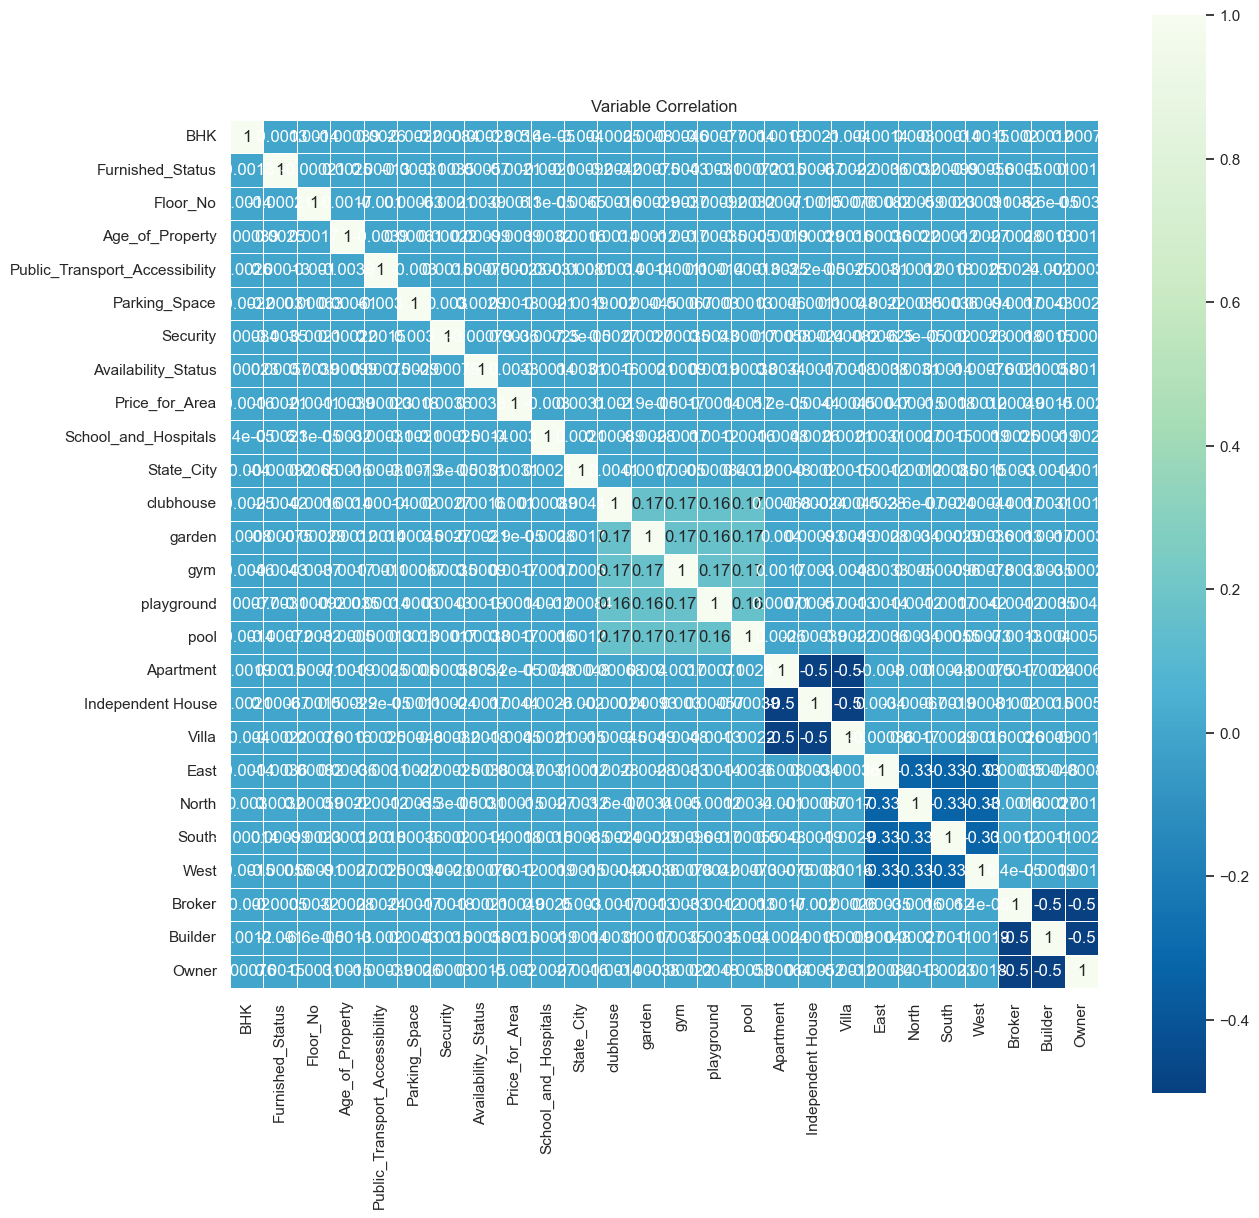

In [180]:
#Correlation Plot
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(x.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')

#### Thus there exists no multicollinearity among the independent variables.  

### Now we fit a multiple linear regression model.  

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,y_train.shape

((183984, 26), (183984,))

In [49]:
x_test.shape,y_test.shape

((45996, 26), (45996,))

In [50]:
scalar=StandardScaler()

In [51]:
scaled_x_train=scalar.fit_transform(x_train)   #We standardise the data as well

In [52]:
scaled_x_test=scalar.transform(x_test)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model=LinearRegression()

In [55]:
model.fit(scaled_x_train,y_train)

LinearRegression()

In [56]:
y_pred=model.predict(scaled_x_test)

In [57]:
y_pred

array([  1.01767895, 201.78760693, 191.74854443, ..., 456.67750186,
       298.04859561, 101.13578198])

### Now we check the performance evaluation of the model 

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regressor Metrics:\n")
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Linear Regressor Metrics:

Mean Absolute Error (MAE): 7.365695638314138
Mean Squared Error (MSE): 84.5972366678326
Root Mean Squared Error (RMSE): 9.197675612231201
R-squared (R²): 0.9956672657974707


### Now, we will see whether linear regression was appropriate for our dataset using residual plots 

In [59]:
residuals=y_test-y_pred

In [60]:
residuals

105709    19.692321
217818     2.472393
64538      7.271456
47148      8.080154
20348     -4.009013
            ...    
246971    20.737967
162824    -3.486116
157451     0.682498
206096    -3.528596
152588     9.174218
Name: Price_in_Lakhs, Length: 45996, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_Lakhs', ylabel='Density'>

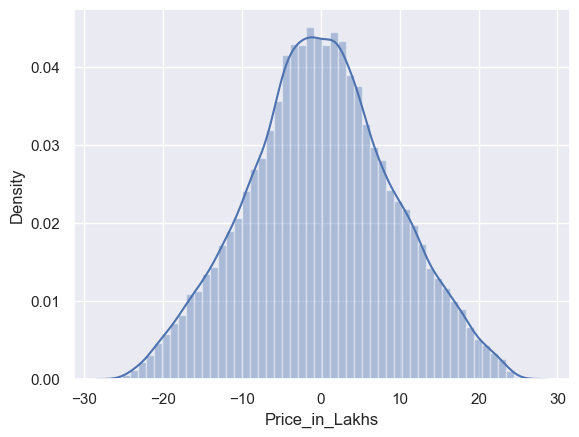

In [203]:
sns.distplot(residuals)

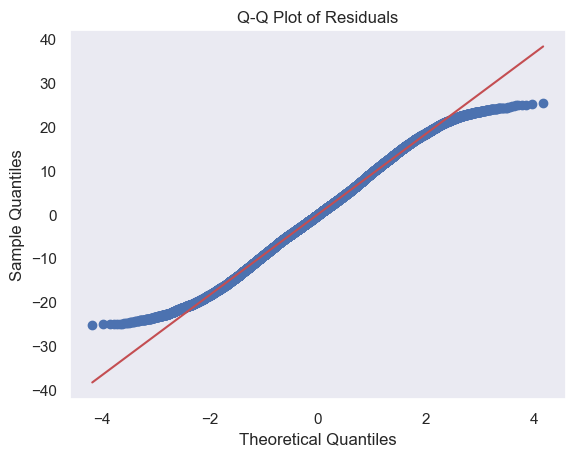

In [207]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

### Thus the residuals are normally distributed 

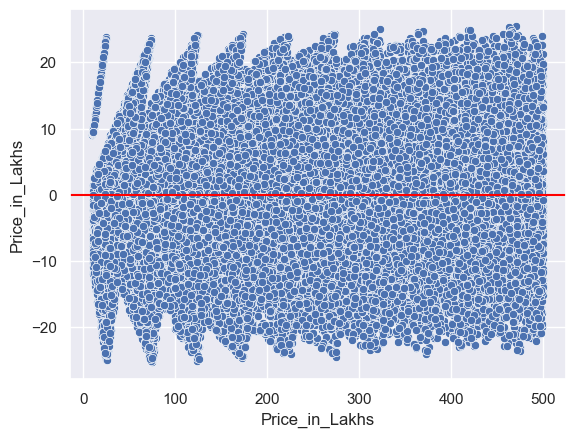

In [238]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='red')

### This is the residual plot which ensures heteroskedasticity 

In [291]:
val=model.coef_

In [292]:
index=x.columns

In [293]:
x.sample(1)

,BHK,Furnished_Status,Floor_No,Age_of_Property,Public_Transport_Accessibility,Parking_Space,Security,Availability_Status,Price_for_Area,School_and_Hospitals,...,Apartment,Independent House,Villa,East,North,South,West,Broker,Builder,Owner
239786,1,0,10,30,2,0,0,0,489.15,8,...,0,1,0,1,0,0,0,1,0,0


In [294]:
index_array = index.values

In [295]:
val

array([ 2.21784084e-03,  2.12785465e-02,  6.92198347e-04,  2.73332741e-03,
       -1.45810581e-02, -7.73657729e-02, -1.79307533e-02, -8.80564547e-02,
        9.95691867e-01,  3.50724246e-03,  6.61967393e-04, -4.41368808e-02,
       -2.17713058e-02, -1.50429541e-02, -4.07288403e-02,  3.60014261e-02,
       -3.56936645e-02,  2.39786678e-02,  1.17149967e-02, -6.43922180e-03,
        4.10241610e-02, -3.01577604e-02, -4.42717880e-03,  1.37736428e-02,
       -5.42950900e-03, -8.34413379e-03])

In [296]:
index_array

array(['BHK', 'Furnished_Status', 'Floor_No', 'Age_of_Property',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Availability_Status', 'Price_for_Area', 'School_and_Hospitals',
       'State_City', 'clubhouse', 'garden', 'gym', 'playground', 'pool',
       'Apartment', 'Independent House', 'Villa', 'East', 'North',
       'South', 'West', 'Broker', 'Builder', 'Owner'], dtype=object)

In [308]:
df1=pd.DataFrame(index_array)

In [309]:
df1

,0
0,BHK
1,Furnished_Status
2,Floor_No
3,Age_of_Property
4,Public_Transport_Accessibility
5,Parking_Space
6,Security
7,Availability_Status
8,Price_for_Area
9,School_and_Hospitals


In [310]:
df1['values']=val

In [311]:
df1

,0,values
0,BHK,0.002218
1,Furnished_Status,0.021279
2,Floor_No,0.000692
3,Age_of_Property,0.002733
4,Public_Transport_Accessibility,-0.014581
5,Parking_Space,-0.077366
6,Security,-0.017931
7,Availability_Status,-0.088056
8,Price_for_Area,0.995692
9,School_and_Hospitals,0.003507


In [313]:
df1.sort_values(by='values', ascending=False)

,0,values
8,Price_for_Area,0.995692
20,North,0.041024
15,pool,0.036001
17,Independent House,0.023979
1,Furnished_Status,0.021279
23,Broker,0.013774
18,Villa,0.011715
9,School_and_Hospitals,0.003507
3,Age_of_Property,0.002733
0,BHK,0.002218


### Interpretation from this:
📈High Importance Features
Price_for_Area (0.995692): This feature has the highest importance score, suggesting that the price per unit area is a dominant factor in determining property value.

North (0.041024): The orientation of the property (facing North) also plays a significant role, possibly due to cultural or environmental preferences.

Pool (0.036001): Having a pool adds considerable value, indicating that buyers value this amenity highly.

Independent House (0.023979): Properties classified as independent houses are more valuable than others, reflecting buyer preferences for privacy and space.

Furnished_Status (0.021279): Whether a property is furnished affects its value, with furnished homes being more desirable.

Broker (0.013774): The involvement of a broker in the transaction adds value, possibly due to perceived legitimacy or convenience.

📉 Low Importance Features
Availability_Status (-0.088056): Interestingly, this feature has a negative score, suggesting that properties marked as unavailable are less desirable or that availability is less of a concern for buyers.

Parking_Space (-0.077366): Despite its practical benefits, the absence of parking space seems to have a negative impact on property value in this dataset.

Clubhouse (-0.044137): Amenities like a clubhouse appear to have a minimal effect on property value, possibly due to oversupply or low utilization.

Garden (-0.021771): While gardens can enhance aesthetic appeal, they may not significantly influence property prices in this context.

Gym (-0.015043): The presence of a gym has a slight negative impact, which could be due to maintenance costs or underutilization.

South (-0.030158): Properties facing South are less preferred in this dataset, possibly due to cultural or climatic reasons.

Apartment (-0.035694): Apartments are less valued compared to independent houses, indicating a preference for more private living spaces.

Owner (-0.008344): Direct transactions with the owner have a minimal negative impact, which could be due to perceived risks or lack of professional mediation.



### Regularization techniques to be used with the model -- > Ridge and Lasso

### Ridge Regression -- > L2 Regularization

In [129]:
from sklearn.linear_model import Ridge

In [130]:
ridge_model=Ridge(alpha=10)

In [131]:
ridge_model.fit(scaled_x_train,y_train)

Ridge(alpha=10)

In [132]:
yr_pred=ridge_model.predict(scaled_x_test)

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [134]:
MAE=mean_absolute_error(y_test,yr_pred)

In [135]:
MAE

7.365500560742545

In [136]:
MSE=mean_squared_error(y_test,yr_pred)

In [137]:
RMSE=np.sqrt(MSE)

In [138]:
RMSE

9.197667989555312

In [139]:
from sklearn.linear_model import RidgeCV

In [140]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [141]:
ridge_cv_model.fit(scaled_x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [142]:
ridge_cv_model.alpha_

0.1

In [143]:
from sklearn.metrics import SCORERS

In [144]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [145]:
ridge_cv_model=Ridge(alpha=0.1)

In [147]:
ridge_cv_model.fit(scaled_x_train,y_train)

Ridge(alpha=0.1)

In [148]:
yr_cv_pred=ridge_cv_model.predict(scaled_x_test)

In [151]:
MAE=mean_absolute_error(y_test,yr_cv_pred)

In [152]:
MAE

7.365474665527203

In [153]:
MSE=mean_squared_error(y_test,yr_cv_pred)

In [154]:
RMSE=np.sqrt(MSE)

In [155]:
RMSE

9.19766216327599

In [156]:
ridge_cv_model.coef_

array([ 3.14074478e-03,  1.73782466e-02,  6.19478958e-03,  2.68082139e-02,
       -1.19203879e-02, -3.86824861e-02, -8.96506397e-03, -4.40277450e-02,
        1.39336093e+02,  1.42527360e-02,  8.20523595e-03, -2.16208110e-02,
       -1.06665247e-02, -7.36861197e-03, -1.99555676e-02,  1.76362719e-02,
       -1.68237092e-02,  1.12902737e-02,  5.51654046e-03, -2.79627574e-03,
        1.77572174e-02, -1.30505881e-02, -1.93093585e-03,  6.49237058e-03,
       -2.56257353e-03, -3.93205043e-03])

### Lasso Regression -- > L1 Regularization

In [166]:
from sklearn.linear_model import LassoCV

In [203]:
lasso_cv_model=LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=1000000)

In [204]:
lasso_cv_model.fit(scaled_x_train,y_train)

LassoCV(cv=5, max_iter=1000000)

In [205]:
lasso_cv_model.alpha_

0.13933561746451392

In [206]:
yl_pred=lasso_cv_model.predict(scaled_x_test)

In [207]:
MAE=mean_absolute_error(y_test,yl_pred)

In [208]:
MAE

7.3661511926412455

In [209]:
MSE=mean_squared_error(y_test,yl_pred)

In [210]:
RMSE=np.sqrt(MSE)

In [211]:
RMSE

9.198125809996807

In [212]:
lasso_cv_model.coef_

array([  0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
       139.19628185,   0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ])

### Ridge and Lasso 

In [217]:
from sklearn.linear_model import ElasticNetCV

In [224]:
elastic_cv_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],eps=0.001,n_alphas=100,max_iter=100000)

In [225]:
elastic_cv_model.fit(scaled_x_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100000)

In [226]:
elastic_cv_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [227]:
elastic_cv_model.l1_ratio_

1.0

In [228]:
elastic_cv_model.alpha_

0.13933561746451392

### So elastic net cv says lasso is the best model 